<a href="https://colab.research.google.com/github/Vibha-Murthy/ITC_Internship/blob/main/ITC_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [ ]:
data = pd.read_csv("input_train_fin.csv")
data

,engine,time_cycle(days),op_setting_1 (Flight Altitude),op_setting_2 (Mach Number),op_setting_3 (Throttling Parser Angle),Total temperature at fan inlet(R),Total temperature at LPC outlet(R),Total temperature at HPC (High-Pressure Compressor) outlet(R),Total temperature at LPT outlet(R),Pressure at fan inlet(psia),...,Ratio of fuel flow to Ps30(pps\psi),Corrected fan speed(rpm),Corrected core speed(rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Demanded fan speed(rpm),Demanded corrected fan speed(rpm),HPT coolant bleed(lbm/s),LPT coolant bleed(lbs/s)
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640


In [ ]:
data = data[["engine","time_cycle(days)", "op_setting_1 (Flight Altitude)","op_setting_2 (Mach Number)", "op_setting_3 (Throttling Parser Angle)", "Physical fan speed(rpm)", "Physical core speed(rpm)", "Static pressure at HPC outlet(psia)", "Ratio of fuel flow to Ps30(pps\psi)", "Corrected fan speed(rpm)", "Corrected core speed(rpm)" ]]
data

,engine,time_cycle(days),op_setting_1 (Flight Altitude),op_setting_2 (Mach Number),op_setting_3 (Throttling Parser Angle),Physical fan speed(rpm),Physical core speed(rpm),Static pressure at HPC outlet(psia),Ratio of fuel flow to Ps30(pps\psi),Corrected fan speed(rpm),Corrected core speed(rpm)
0,1,1,-0.0007,-0.0004,100,2388.06,9046.19,47.47,521.66,2388.02,8138.62
1,1,2,0.0019,-0.0003,100,2388.04,9044.07,47.49,522.28,2388.07,8131.49
2,1,3,-0.0043,0.0003,100,2388.08,9052.94,47.27,522.42,2388.03,8133.23
3,1,4,0.0007,0.0000,100,2388.11,9049.48,47.13,522.86,2388.08,8133.83
4,1,5,-0.0019,-0.0002,100,2388.06,9055.15,47.28,522.19,2388.04,8133.80
...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,2388.19,9065.52,48.07,519.49,2388.26,8137.60
20627,100,197,-0.0016,-0.0005,100,2388.23,9065.11,48.04,519.68,2388.22,8136.50
20628,100,198,0.0004,0.0000,100,2388.24,9065.90,48.09,520.01,2388.24,8141.05
20629,100,199,-0.0011,0.0003,100,2388.25,9073.72,48.39,519.67,2388.23,8139.29


In [ ]:
mean=0
for i in data.index:
  if (data["time_cycle(days)"][i] >0) and (data["time_cycle(days)"][i] <51):
    mean=mean + data["Physical fan speed(rpm)"][i]
mean = mean/(100*50)
mean

2388.060129999971

In [ ]:
max_val=max(data["Physical fan speed(rpm)"])
min_val=min(data["Physical fan speed(rpm)"])
max_val
min_val

2387.9

In [ ]:
std_dev = st.stdev(data["Physical fan speed(rpm)"])
std_dev

0.07098547889092417

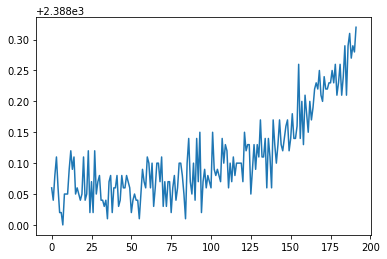

In [ ]:
plt.plot(data["Physical fan speed(rpm)"][0:192])

In [ ]:
threshold = 20
fail = []
k=1
count=0
for i in data.index:
  if (data["time_cycle(days)"][i] >=100) and (data["time_cycle(days)"][i] <151):
      x=data["Physical fan speed(rpm)"][i]
      if (x> mean+std_dev) or (x< mean-std_dev):
        count=count+1
      if data["time_cycle(days)"][i] == 150:
        if count > threshold:
          fail.append(k)
          k=k+1
          count=0

print(fail)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [ ]:
"""threshold = 20
fail = []
count = 0
k=1
i=0
print(data["engine"][i])
for k in range (1,101):
  count=0
  while k == data["engine"][i]:
      if (data["time_cycle(days)"][i]>100 )and (data["time_cycle(days)"][i]<151): 
        x=data["Physical fan speed(rpm)"][i]
        if (x> mean+std_dev) or (x< mean-std_dev):
          count=count+1
      i=i+1
  if count > threshold:
    fail.append(i)

print(fail)"""

In [ ]:
k=1
d={}
count=0
for i in data.index:
  if k== data["engine"][i]:
    count=count+1
    pass
  else:
    d[k]=count
    count=0
    k=k+1
    i=i-1
print (d)

{1: 192, 2: 286, 3: 178, 4: 188, 5: 268, 6: 187, 7: 258, 8: 149, 9: 200, 10: 221, 11: 239, 12: 169, 13: 162, 14: 179, 15: 206, 16: 208, 17: 275, 18: 194, 19: 157, 20: 233, 21: 194, 22: 201, 23: 167, 24: 146, 25: 229, 26: 198, 27: 155, 28: 164, 29: 162, 30: 193, 31: 233, 32: 190, 33: 199, 34: 194, 35: 180, 36: 157, 37: 169, 38: 193, 39: 127, 40: 187, 41: 215, 42: 195, 43: 206, 44: 191, 45: 157, 46: 255, 47: 213, 48: 230, 49: 214, 50: 197, 51: 212, 52: 212, 53: 194, 54: 256, 55: 192, 56: 274, 57: 136, 58: 146, 59: 230, 60: 171, 61: 184, 62: 179, 63: 173, 64: 282, 65: 152, 66: 201, 67: 312, 68: 198, 69: 361, 70: 136, 71: 207, 72: 212, 73: 212, 74: 165, 75: 228, 76: 209, 77: 153, 78: 230, 79: 198, 80: 184, 81: 239, 82: 213, 83: 292, 84: 266, 85: 187, 86: 277, 87: 177, 88: 212, 89: 216, 90: 153, 91: 134, 92: 340, 93: 154, 94: 257, 95: 282, 96: 335, 97: 201, 98: 155, 99: 184}


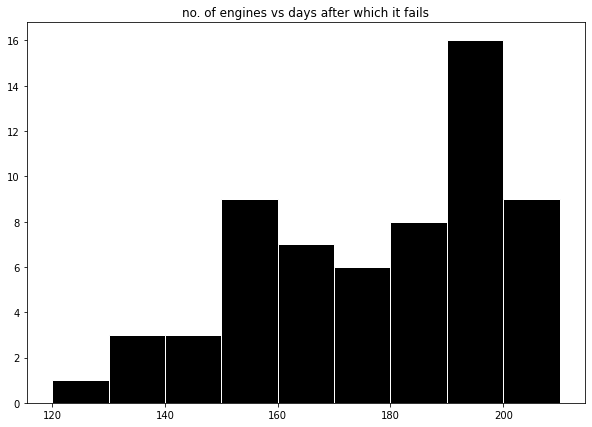

In [ ]:
a=np.array(list(d.values()))
min_cycles=min(a)
#print(min_cycles)
fig, ax = plt.subplots(figsize =(10, 7))
N, bins, patches = ax.hist(a, edgecolor='white',bins = [120, 130, 140, 150, 160, 170, 180, 190, 200, 210], linewidth=1)
colors=['r','yellow','black','b','grey','pink','orange','purple','brown']
for i in range(0,9):
    patches[i].set_facecolor('black')

plt.title("no. of engines vs days after which it fails")
plt.show()